<a href="https://colab.research.google.com/github/mimasc/CP2-andre/blob/main/CP2ANDRE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CP2 - Soluções em Energias Renováveis e Sustentáveis
ANDRÉ TRITIACK DE FARIAS

INTEGRANTES:
André Ayello de Nobrega RM561754

André Gouveia de Lima RM564219

Caio Castelão Carminato RM563630

Guilherme Vasques Tamai RM563276

Mirella Mascarenhas RM562092

Vitor Komura de Freitas RM563694



Parte 1 – Regressão (Appliances Energy Prediction)


                           R²       RMSE        MAE
Regressão Linear     0.169362  91.171659  52.547078
Árvore de Regressão  0.125249  93.561272  39.227261
Random Forest        0.538389  67.966080  32.021586


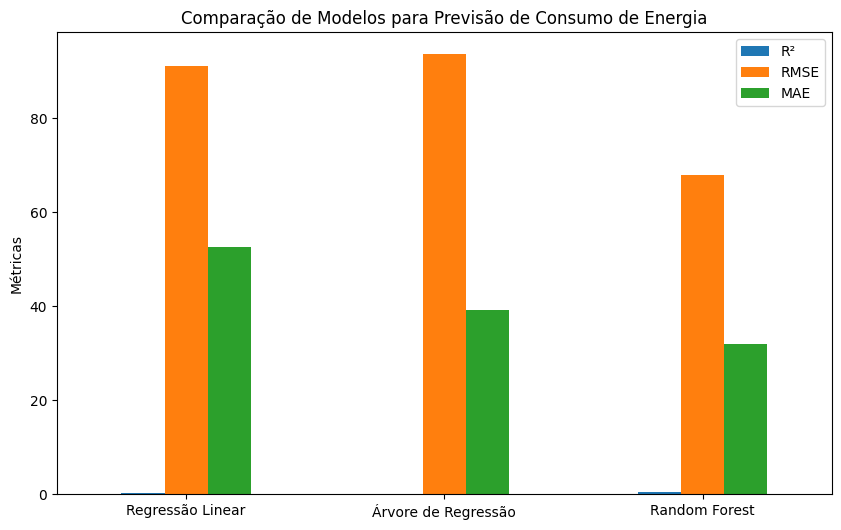

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

df = pd.read_csv("/content/energydata_complete.csv")

df = df.drop(columns=["date", "rv1", "rv2"])

X = df.drop(columns=["Appliances"])
y = df["Appliances"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

models = {
    "Regressão Linear": LinearRegression(),
    "Árvore de Regressão": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_jobs=-1)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    results[name] = {"R²": r2, "RMSE": rmse, "MAE": mae}

results_df = pd.DataFrame(results).T
print(results_df)

results_df[["R²", "RMSE", "MAE"]].plot(kind="bar", figsize=(10,6))
plt.title("Comparação de Modelos para Previsão de Consumo de Energia")
plt.ylabel("Métricas")
plt.xticks(rotation=0)
plt.show()

Parte 2 – Classificação (Smart Grid Stability)


       tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab     stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable  

🔹 Árvore de Decisão
Acurácia: 1.0000
F1-score: 1.0000
Matriz de Confusão:
 [[4344    0]
 [   0 7656]]


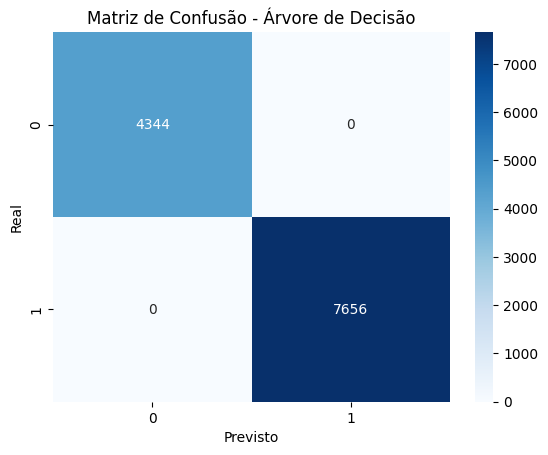


🔹 KNN
Acurácia: 0.8327
F1-score: 0.8727
Matriz de Confusão:
 [[3109 1235]
 [ 773 6883]]


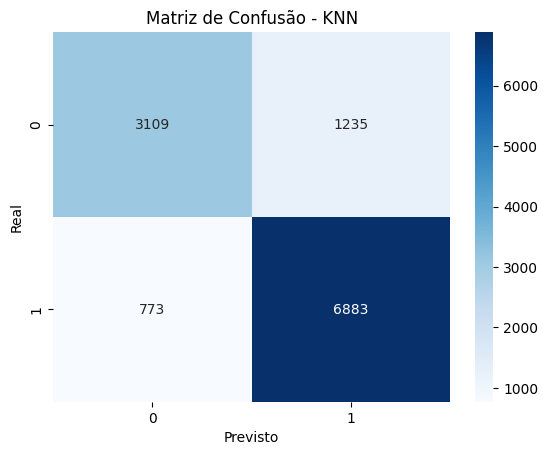


🔹 Regressão Logística
Acurácia: 0.9627
F1-score: 0.9710
Matriz de Confusão:
 [[4071  273]
 [ 174 7482]]


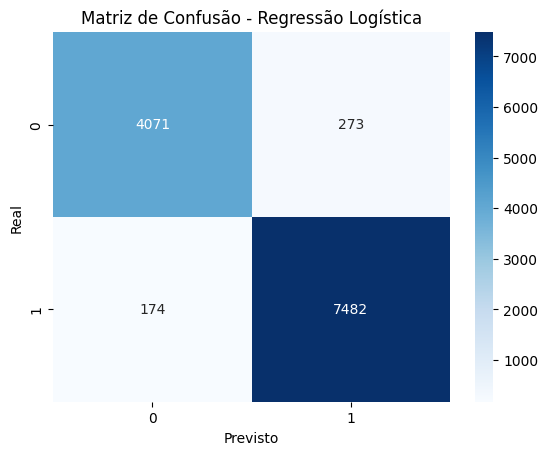

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("/content/smart_grid_stability_augmented.csv")

print(df.head())

X = df.drop(columns=["stabf"])
y = df["stabf"]

y = y.map({"stable": 0, "unstable": 1})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

models = {
    "Árvore de Decisão": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Regressão Logística": LogisticRegression(max_iter=1000)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {"Acurácia": acc, "F1-score": f1, "Matriz de Confusão": cm}

for name, metrics in results.items():
    print(f"\n🔹 {name}")
    print(f"Acurácia: {metrics['Acurácia']:.4f}")
    print(f"F1-score: {metrics['F1-score']:.4f}")
    print("Matriz de Confusão:\n", metrics["Matriz de Confusão"])

    sns.heatmap(metrics["Matriz de Confusão"], annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusão - {name}")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.show()

Exercício 1 – Classificação (Solar)

Treinando Árvore de Decisão...

 Desempenho do Modelo: Árvore de Decisão
Acurácia: 0.8357


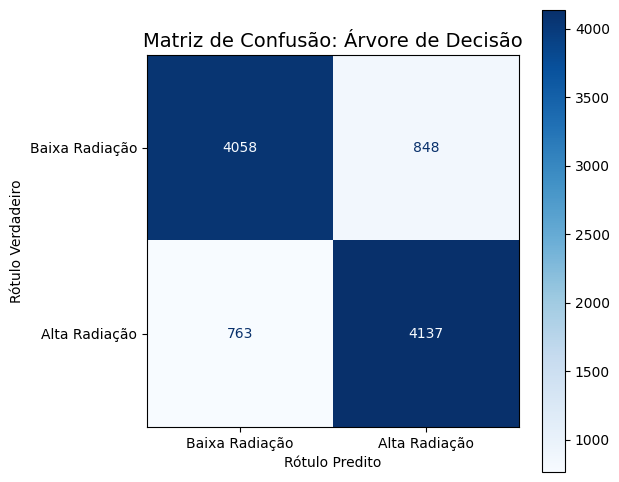


Treinando Random Forest...

 Desempenho do Modelo: Random Forest
Acurácia: 0.8821


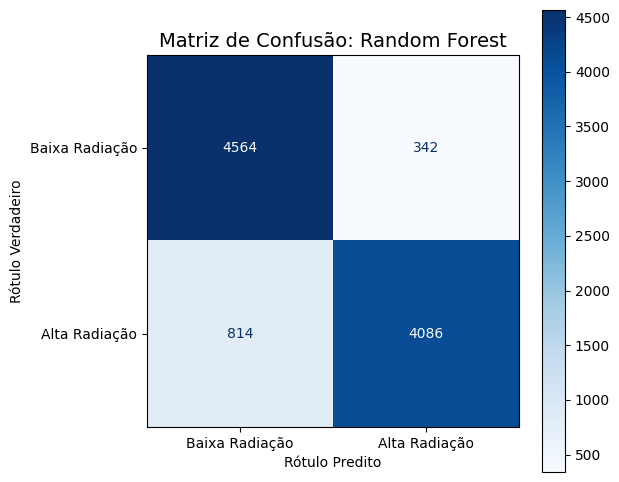


Treinando SVM...

 Desempenho do Modelo: SVM
Acurácia: 0.8363


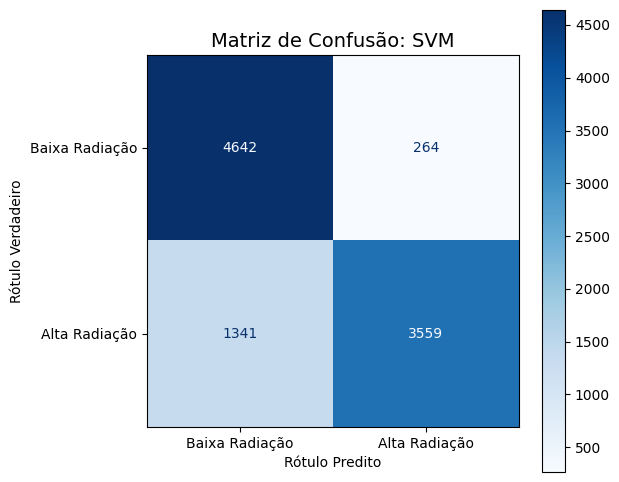


 Resumo de Acurácia dos Modelos
Árvore de Decisão: 0.8357
Random Forest: 0.8821
SVM: 0.8363


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

def evaluate_model(model, X_test, y_test, model_name):
    """
    Treina e avalia um modelo, exibindo a acurácia e a matriz de confusão.
    """
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n Desempenho do Modelo: {model_name}")
    print(f"Acurácia: {accuracy:.4f}")

    # Plotar a matriz de confusão
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Baixa Radiação', 'Alta Radiação'])
    fig, ax = plt.subplots(figsize=(6, 6))
    disp.plot(ax=ax, cmap='Blues')
    ax.set_title(f"Matriz de Confusão: {model_name}", fontsize=14)
    ax.set_xlabel("Rótulo Predito")
    ax.set_ylabel("Rótulo Verdadeiro")
    plt.show()
    return accuracy

# Carregue o dataset
file_path = '/content/SolarPrediction.csv'
df = pd.read_csv(file_path)


# Limpar os nomes das colunas
df.columns = df.columns.str.replace('[^A-Za-z0-9_]+', '', regex=True)

# Criar a variável-alvo 'Radiation_Class'
median_radiation = df['Radiation'].median()
df['Radiation_Class'] = (df['Radiation'] > median_radiation).astype(int)

# Definir X e y
features = ['Temperature', 'Pressure', 'Humidity', 'WindDirectionDegrees', 'Speed']
target = 'Radiation_Class'

X = df[features]
y = df[target]

# Dividir os dados em treino e teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Treinar e avaliar os modelos

# Árvore de Decisão
print("Treinando Árvore de Decisão...")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_accuracy = evaluate_model(dt_model, X_test_scaled, y_test, "Árvore de Decisão")

# Random Forest
print("\nTreinando Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_accuracy = evaluate_model(rf_model, X_test_scaled, y_test, "Random Forest")

# Support Vector Machine (SVM)
print("\nTreinando SVM...")
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_accuracy = evaluate_model(svm_model, X_test_scaled, y_test, "SVM")

# Comparar os resultados
print("\n Resumo de Acurácia dos Modelos")
print(f"Árvore de Decisão: {dt_accuracy:.4f}")
print(f"Random Forest: {rf_accuracy:.4f}")
print(f"SVM: {svm_accuracy:.4f}")

Exercício 2 – Regressão (Eólica)



Treinando: Árvore de Decisão
Acurácia: 0.92


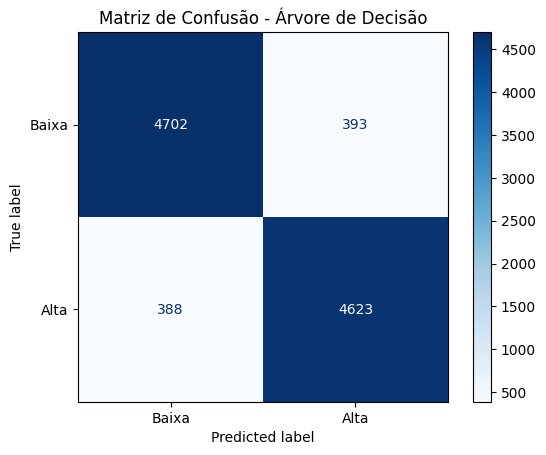


Treinando: Random Forest
Acurácia: 0.94


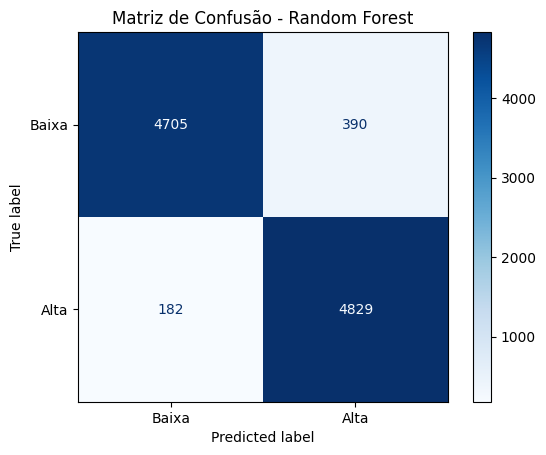


Treinando: SVM
Acurácia: 0.95


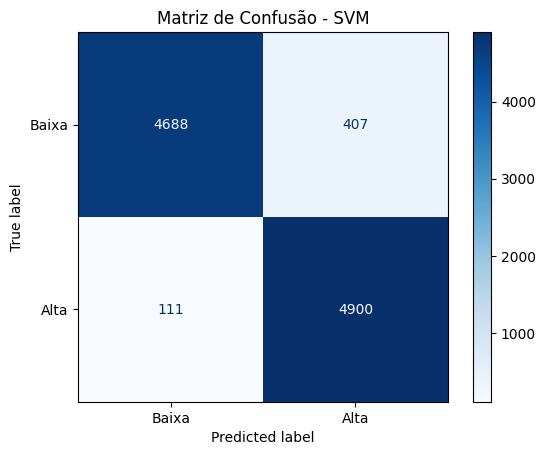

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


file_path = '/content/T1.csv'

try:
    df = pd.read_csv(file_path, encoding='latin-1')
except FileNotFoundError:
    print(f"\nERRO FATAL: Arquivo não encontrado em: {file_path}")
    exit()


df.columns = [
    'Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)',
    'Theoretical_Power_Curve (KWh)', 'Wind Direction (degrees)'
]


threshold = df['LV ActivePower (kW)'].median()
df['Power_Class'] = np.where(df['LV ActivePower (kW)'] >= threshold, 1, 0)


features = ['Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (degrees)']
X = df[features].copy()
y = df['Power_Class']


X.fillna(X.mean(numeric_only=True), inplace=True)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


models = {
    "Árvore de Decisão": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42)
}


for name, model in models.items():
    print(f"\nTreinando: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Acurácia: {acc:.2f}")

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Baixa", "Alta"])
    disp.plot(cmap='Blues')
    plt.title(f"Matriz de Confusão - {name}")
    plt.show()